In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import glob
import matplotlib.pyplot as plt

In [ ]:
# Directory where the dataset is stored
dataset_dir = '/content/drive/MyDrive/student_images'
image_size = (224, 224)

In [ ]:
# Load images and labels
images = []
labels = []
label_names = []

for file in glob.glob(os.path.join(dataset_dir, "*.jpg")):
    label = file.split('/')[-1].split('.')[0]
    img = cv2.imread(file)
    img = cv2.resize(img, image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    if label not in label_names:
        label_names.append(label)
    labels.append(label_names.index(label))

In [ ]:
label_names

['Fahim',
 'Abir',
 'Hemel',
 'Shepon',
 'Nipa',
 'Rupak',
 'Sabiqul',
 'Tama',
 'Tarup',
 'Tamim']

In [ ]:
# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)
n_classes = len(label_names)

In [ ]:
# Normalize images
X = X / 255.0

In [ ]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_one_hot = np.eye(n_classes)[y_train]
y_val_one_hot = np.eye(n_classes)[y_val]

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Define the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(n_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Data/Model/face_recognition_model_best.keras', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32), epochs=30,
                    validation_data=(X_val, y_val_one_hot), callbacks=[early_stopping, checkpoint])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.1084 - loss: 20.7727 - val_accuracy: 0.0985 - val_loss: 19.4519
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 805ms/step - accuracy: 0.1721 - loss: 20.0989 - val_accuracy: 0.2069 - val_loss: 19.3823
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 869ms/step - accuracy: 0.2082 - loss: 19.7824 - val_accuracy: 0.2069 - val_loss: 19.2729
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 675ms/step - accuracy: 0.2392 - loss: 19.5476 - val_accuracy: 0.2069 - val_loss: 19.1891
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 657ms/step - accuracy: 0.3186 - loss: 19.1463 - val_accuracy: 0.3103 - val_loss: 19.0529
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 874ms/step - accuracy: 0.3437 - loss: 19.0538 - val_accuracy: 0.2217 - val_loss: 18.9925
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 685ms/step - accuracy: 0.3828 - loss: 18.6166 - val_accuracy: 0.2956 - val_loss: 18.7675
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 796ms/step - accuracy: 0.4665 - loss: 18.3741 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Data/Model/face_recognition_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Data/Model/face_recognition_model.keras')

In [ ]:
test_image_path = '/content/drive/MyDrive/student_images/Fahim.0.1414.26.jpg'

In [ ]:
test_img = cv2.imread(test_image_path)
test_img = cv2.resize(test_img, (224, 224))  # Resize to match model's expected input size
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
test_img_normalized = test_img_rgb / 255.0  # Normalize pixel values to [0, 1]
test_img_expanded = np.expand_dims(test_img_normalized, axis=0)

In [ ]:
predictions = model.predict(test_img_expanded)
predicted_class = np.argmax(predictions, axis=1)
predicted_label = label_names[predicted_class[0]]  # Map the index to the actual label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


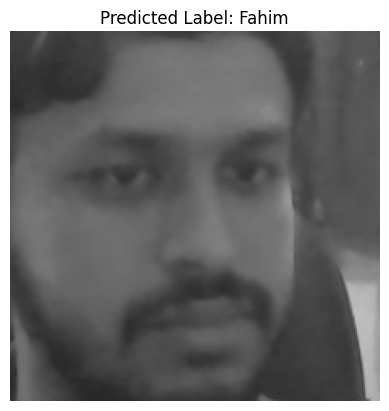

In [ ]:
plt.imshow(test_img_rgb)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()